In [ ]:
!pip install plotly --upgrade
!pip install kneed # To install only knee-detection algorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
base= pd.read_csv('/content/sample_data/iris.csv', ',',encoding='cp1252')
base

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
Entrada = base.iloc[:, 0:4].values
Entrada.shape

(150, 4)

OUTLIERS

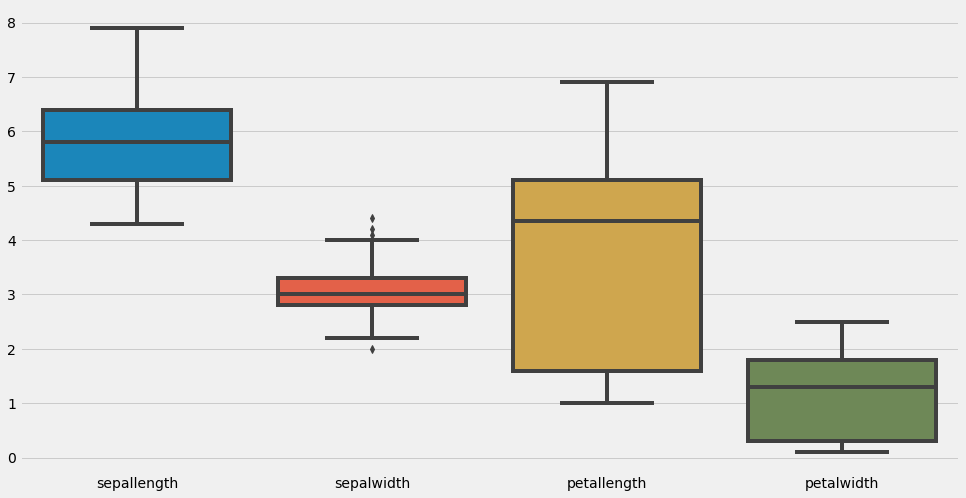

In [ ]:
plt.figure(figsize=[15,8])
sns.boxplot(data=base)

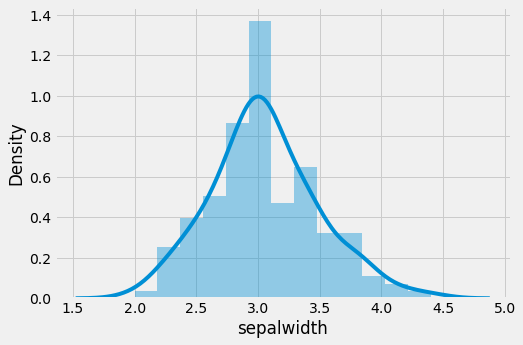

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(base['sepalwidth'])
plt.show()

In [ ]:
print("Old Shape: ", base.shape)
q1 = base['sepalwidth'].quantile(0.25)
q3 = base['sepalwidth'].quantile(0.75)
iqr = q3 - q1
lower_bound  = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
base = base.drop(base[base['sepalwidth'] < lower_bound].index)
base = base.drop(base[base['sepalwidth'] > upper_bound].index)
print("New Shape: ", base.shape)

Old Shape:  (146, 5)
New Shape:  (146, 5)


In [ ]:
y = base['class']
base.drop(["class"], axis=1, inplace=True)

In [ ]:
# Ver quantas colunas terá no dataset
base.shape

(146, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(base, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
clustering_data = scaler.fit_transform(clustering_data)

In [ ]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((clustering_data.shape[0] // 2) ** 0.5)

for k in range(2, limit + 1):
    model = KMeans(n_clusters=k)
    model.fit(clustering_data)
    pred = model.predict(clustering_data)
    score = silhouette_score(clustering_data, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.618
Silhouette Score k = 3: 0.477
Silhouette Score k = 4: 0.426
Silhouette Score k = 5: 0.360
Silhouette Score k = 6: 0.336
Silhouette Score k = 7: 0.355
Silhouette Score k = 8: 0.361


In [ ]:
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(clustering_data)
  wcss.append(kmeans.inertia_)

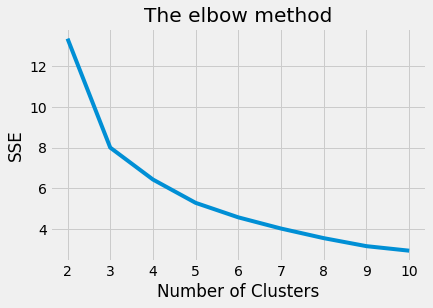

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

In [ ]:
# K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
# kmeans = KMeans(n_clusters=3, random_state=0)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y = kmeans.fit_predict(clustering_data)

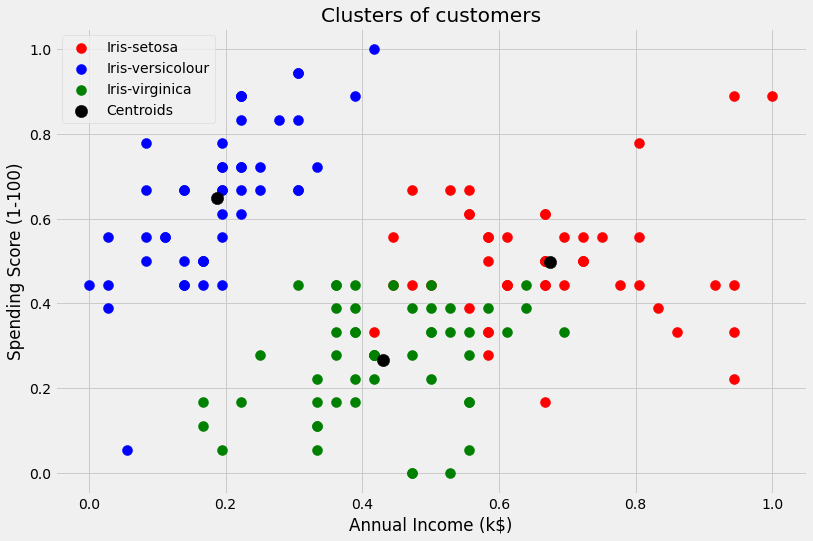

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(clustering_data[Y == 0, 0], clustering_data[Y == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(clustering_data[Y == 1, 0], clustering_data[Y == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(clustering_data[Y == 2, 0], clustering_data[Y == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
labels = kmeans.labels_
labels 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [ ]:
df1 = pd.DataFrame({'labels':labels, "species": y})
ct1 = pd.crosstab(df1['labels'], df1['species'])
ct1

species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,9,39
1,47,0,0
2,0,40,11


In [ ]:
limit = int((Entrada_X_train.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada_X_train)
    pred = model.predict(Entrada_X_train)
    score = silhouette_score(Entrada_X_train, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.613
Silhouette Score k = 3: 0.459
Silhouette Score k = 4: 0.419
Silhouette Score k = 5: 0.355
Silhouette Score k = 6: 0.341
Silhouette Score k = 7: 0.337


In [ ]:
Entrada_X_train = X_train.iloc[:, 0:4].values
Entrada_X_train.shape
scaler = MinMaxScaler()
Entrada_X_train = scaler.fit_transform(Entrada_X_train)

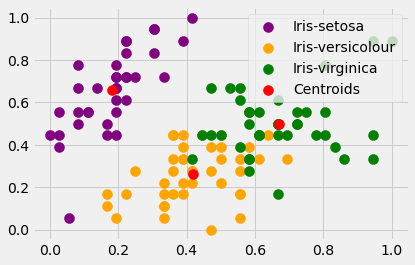

In [ ]:
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada_X_train)
  wcss.append(kmeans.inertia_)
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada_X_train)
#Visualising the clusters
plt.scatter(Entrada_X_train[saida_kmeans == 0, 0], Entrada_X_train[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada_X_train[saida_kmeans == 1, 0], Entrada_X_train[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada_X_train[saida_kmeans == 2, 0], Entrada_X_train[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

In [ ]:
limit = int((Entrada_X_test.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(Entrada_X_test)
    pred = model.predict(Entrada_X_test)
    score = silhouette_score(Entrada_X_test, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.635
Silhouette Score k = 3: 0.576


In [ ]:
Entrada_X_test = X_test.iloc[:, 0:4].values
Entrada_X_test.shape
scaler = MinMaxScaler()
Entrada_X_test = scaler.fit_transform(Entrada_X_test)

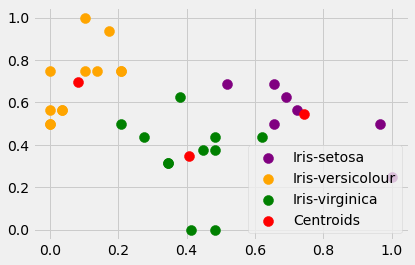

In [ ]:
wcss = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(Entrada_X_test)
  wcss.append(kmeans.inertia_)
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(Entrada_X_test)
#Visualising the clusters
plt.scatter(Entrada_X_test[saida_kmeans == 0, 0], Entrada_X_test[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada_X_test[saida_kmeans == 1, 0], Entrada_X_test[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada_X_test[saida_kmeans == 2, 0], Entrada_X_test[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()